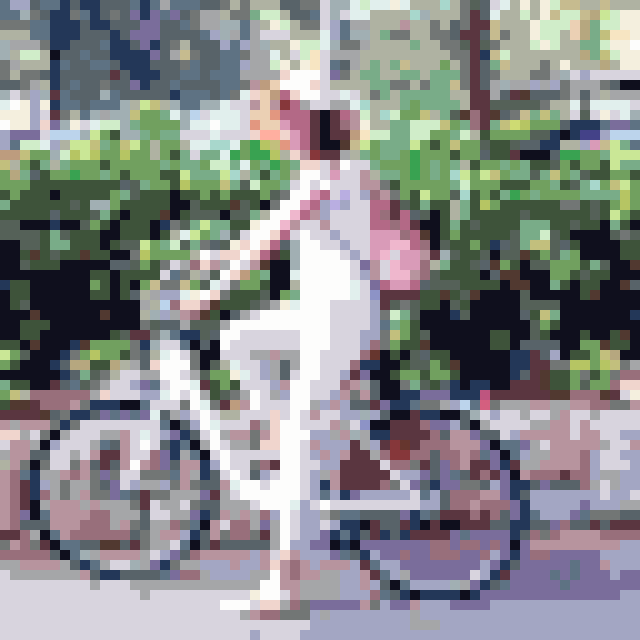

In [31]:
from IPython.display import display
from PIL import Image,ImageColor,ImageEnhance,ImageDraw,ImageFont
import colorsys
import palette
import csv
import numpy as np

title_font = ImageFont.truetype('Playfair_Display/PlayfairDisplay-VariableFont_wght.ttf', 9)

im_init = Image.open(r'./kalan_bycicle_3.png')
im_init = im_init.convert('RGB') 

display(im_init)


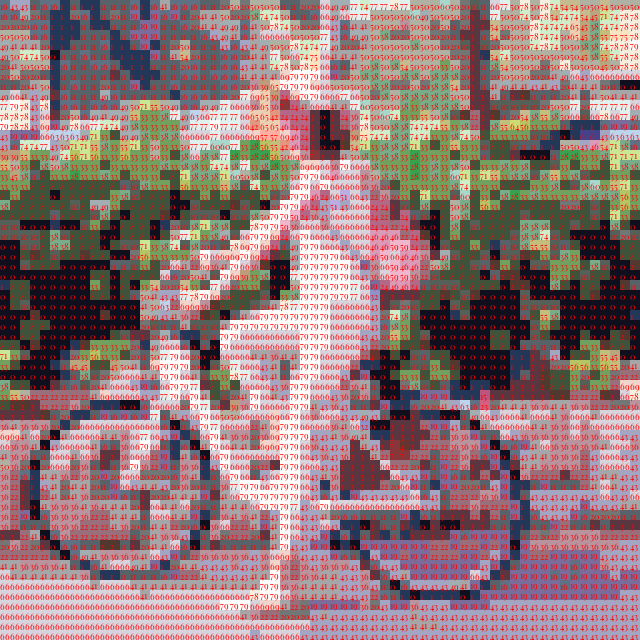

In [32]:
def clamp(x): 
    return max(0, min(x, 255))

def convertToHex(r,g,b):
    return "#{0:02x}{1:02x}{2:02x}".format(clamp(r), clamp(g), clamp(b))

pixelMap = im_init.load()
foo = palette.colors
image_editable = ImageDraw.Draw(im_init)
#display(im_init)

#list(foo.keys())[list(foo.values()).index('#66362e')]
csv_arr = []
for i in range(5,im_init.size[0],10):
    csv_row = []
    for j in range(5,im_init.size[1],10):
            col = pixelMap[i,j]
            hex = convertToHex(col[0],col[1],col[2])
            try:
                num = list(foo.keys())[list(foo.values()).index(hex)]
            except ValueError:
                num = '?'        
            
            image_editable.text((i-5,j-5), num, (255, 0, 0), font=title_font)
            csv_row.append(num)
    
    csv_arr.append(csv_row)

im_init

In [30]:
l_2d = np.array(csv_arr).T
csv_arr = np.array(l_2d).tolist()

with open("new_file.csv","w+") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=';')
    csvWriter.writerows(csv_arr)
   

newList = list()
for line in l_2d:
    for elem in line:
        newList.append(elem)

newFreqArr = list()
newFreqArr.append(Counter(newList).keys())
newFreqArr.append(Counter(newList).values())


with open("new_freq.csv","w+") as my_csv1:
    csvWriter = csv.writer(my_csv1,delimiter=';')
    csvWriter.writerows(newFreqArr)
    

Size: 1600 x 400


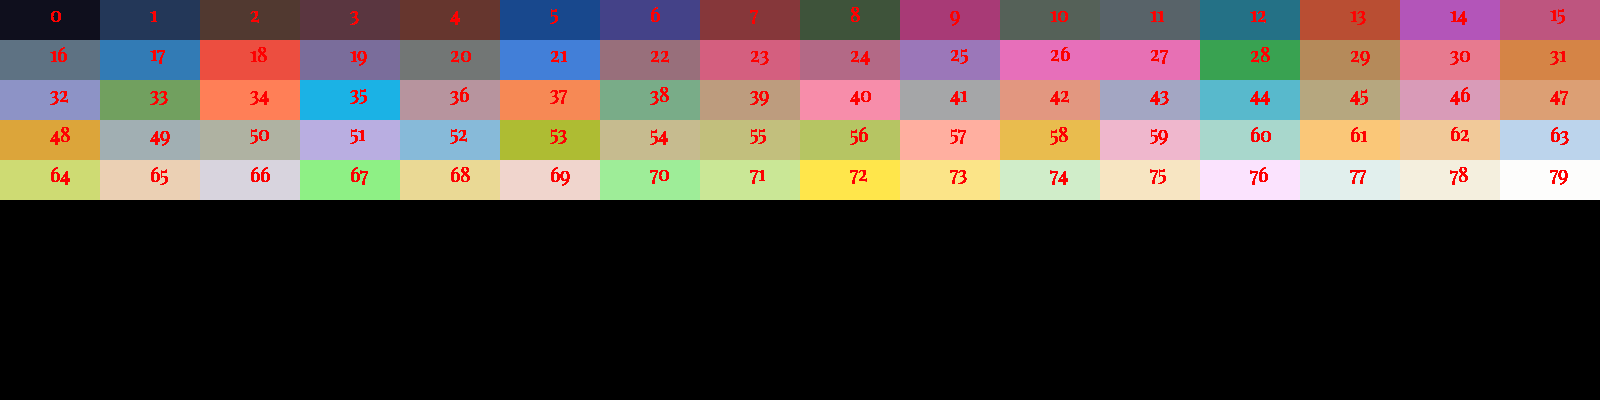

In [16]:
import math;
from collections import Counter

im_resultRGB = Image.new( im_init.mode, (1600,400))
pixelMapRGB = im_resultRGB.load()

image_editable = ImageDraw.Draw(im_resultRGB)
title_font = ImageFont.truetype('Playfair_Display/PlayfairDisplay-VariableFont_wght.ttf', 20)

print("Size:",im_resultRGB.size[0],"x",im_resultRGB.size[1])

for ind in range(0,80):
    num = foo[str(ind)]
    for i in range(0,40):
        for j in range(0,100):
            pixelMapRGB[(ind%16*100 + j),(math.floor(ind/16)*40+i)] = ImageColor.getrgb(num) 
            image_editable.text((ind%16*100 + 50,math.floor(ind/16)*40), str(ind), (255, 0, 0), font=title_font)
im_resultRGB        